<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Произведем-необходимые-импорты" data-toc-modified-id="Произведем-необходимые-импорты-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Произведем необходимые импорты</a></span></li><li><span><a href="#Загрузим-датасет" data-toc-modified-id="Загрузим-датасет-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузим датасет</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Пропуски-в-данных" data-toc-modified-id="Пропуски-в-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Пропуски в данных</a></span></li><li><span><a href="#Явные-дубликаты" data-toc-modified-id="Явные-дубликаты-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Явные дубликаты</a></span></li><li><span><a href="#Визуализация-и-поиск-выбросов" data-toc-modified-id="Визуализация-и-поиск-выбросов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Визуализация и поиск выбросов</a></span></li><li><span><a href="#Изучение-остальных-признаков,-с-помощью-визуализации" data-toc-modified-id="Изучение-остальных-признаков,-с-помощью-визуализации-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучение остальных признаков, с помощью визуализации</a></span></li></ul></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Создание новых признаков</a></span></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Гипотезы</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза 2</a></span></li></ul></li><li><span><a href="#Машинное-обучение" data-toc-modified-id="Машинное-обучение-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Машинное обучение</a></span><ul class="toc-item"><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Кодирование категориальных признаков</a></span></li><li><span><a href="#Проверка-разных-моделей" data-toc-modified-id="Проверка-разных-моделей-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проверка разных моделей</a></span></li></ul></li></ul></div>

Перед нами стоит задача понять какие факторы оказывают влияние на цены поддержанных автомобилей. Для этого мы воспользуемся готовыми датасетами с ресурса kaggle и открытые данные об автомобилях с сайта auto.ru. Ссылки на датасеты представлены ниже:

<!-- cars_1 https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?resource=download -->

cars https://www.kaggle.com/datasets/slavapasedko/belarus-used-cars-prices

<!-- cars_3 https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars?resource=download -->



## Произведем необходимые импорты

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

RANDOM_SEED = 123452024
import warnings
warnings.filterwarnings("ignore")

## Загрузим датасет

**cars_1**

In [111]:
# # cars_1= pd.read_csv('cars_1.csv',index_col='Unnamed: 0')
# cars_1.sample(2)

In [112]:
# cars_1.head(20)

**cars_2**

In [60]:
cars = pd.read_csv('cars_2.csv')
cars.sample(2)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
19464,porsche,cayenne,14499,2008,with mileage,237000.0,petrol,3600.0,black,auto,all-wheel drive,J
42138,nissan,qashqai,8900,2007,with mileage,228100.0,petrol,2000.0,black,auto,front-wheel drive,J


**cars_3**

In [61]:
# cars_3 = pd.read_csv('cars_3.csv')
# cars_3.sample(10)

In [62]:
# cars_2.loc[cars_2['make']=='Land Rover']

In [63]:
# cars_2['make'].unique()

In [64]:
# cars_1['make'] = cars_1['Name'].apply(lambda x: x.split()[0])

In [65]:
# cars_1

In [66]:
# cars_2.info()

## EDA

Изучим датасет, чтобы было понятно в какую сторону нужно двигаться.

In [67]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56244 non-null  object 
 1   model                56244 non-null  object 
 2   priceUSD             56244 non-null  int64  
 3   year                 56244 non-null  int64  
 4   condition            56244 non-null  object 
 5   mileage(kilometers)  56244 non-null  float64
 6   fuel_type            56244 non-null  object 
 7   volume(cm3)          56197 non-null  float64
 8   color                56244 non-null  object 
 9   transmission         56244 non-null  object 
 10  drive_unit           54339 non-null  object 
 11  segment              50953 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.1+ MB


Из информации о датасете становится понятно, что имеется 8 текстовых признаков, 2 целочисленных и 2 дробных признака. Датасет имеет 56243 записи, что отлично подходит для его изучения.

### Пропуски в данных

Изучим количество пропусков в датасете

In [68]:
cars.isna().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

Пропусков совсем небольшое количетсво. Нужно чуть подробнее изучить в каких случаях они повявляются, чтобы решить, что с ними можно сделать

In [69]:
cars.loc[cars['volume(cm3)'].isna()].head(10)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
2268,alfa-romeo,147,8097,2007,with mileage,700.0,electrocar,NaN,burgundy,mechanics,NaN,C
4377,peugeot,406,5780,1995,with mileage,333333.0,electrocar,NaN,silver,auto,front-wheel drive,D
4865,fiat,500,14500,2014,with mileage,49000.0,electrocar,NaN,orange,auto,front-wheel drive,M
4867,fiat,500,13200,2013,with mileage,59900.0,electrocar,NaN,gray,auto,front-wheel drive,M
4868,fiat,500,14500,2015,with mileage,30000.0,electrocar,NaN,gray,auto,front-wheel drive,M
23577,cadillac,elr,25900,2014,with mileage,70000.0,electrocar,NaN,silver,auto,front-wheel drive,NaN
29346,bmw,i3,38000,2018,with mileage,67000.0,electrocar,NaN,other,auto,rear drive,NaN
29347,bmw,i3,57383,2017,with mileage,2822.0,electrocar,NaN,blue,auto,rear drive,NaN
29350,bmw,i3,22900,2014,with mileage,71500.0,electrocar,NaN,silver,auto,rear drive,NaN
29351,bmw,i3,22900,2015,with mileage,50000.0,electrocar,NaN,black,auto,rear drive,NaN


Можем увидеть, что пропуски в объеме двигателя связаны с тем, что в датасете есть электрокары. Постараемся избавиться от этих пропусков заменой на значение 0, потому что этот признак означает налиичие двигателя внутреннего сгорания. У электрокаров такой двигатель отсутствует, значит мы можем указать, что его объем равен 0.

В двух других признаках нет каких-то явных причин появления пропусков, поэтому постараемся их заполнить после того, как изучим распределения этих переменных.

In [70]:
cars['volume(cm3)'] = cars['volume(cm3)'].fillna(0)

In [71]:
cars.isna().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)               0
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

В признаках drive_unit и segment заменим пропуски на новую категорию "unknown"

In [113]:
cars['drive_unit'] = cars['drive_unit'].fillna('unknown')
cars['segment'] = cars['segment'].fillna('unknown')
cars.isna().sum()

make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
dtype: int64

### Явные дубликаты 

Стоит избавиться от всех явных дубликатов, то есть таких строк, которые повторяются.

In [114]:
cars.duplicated().sum()

87

Видим, что встроенный метод в pandas обнаружил 87 явных дубликата. Дубликаты никакой ценности для нас не несут, но реальность такова, что в таких данных(без какого-то более менее уникального признака) трудно сказать является ли запись дубликатом, постараемся это понять.

In [115]:
cars[cars.duplicated()]

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
1930,audi,100,1280,1991,with mileage,305000.0,petrol,2300.0,red,mechanics,front-wheel drive,E
2054,audi,100,2000,1988,with mileage,350000.0,petrol,2300.0,blue,mechanics,front-wheel drive,E
2140,audi,100,1100,1989,with mileage,350000.0,petrol,2300.0,burgundy,mechanics,front-wheel drive,E
2179,peugeot,106,700,2000,with mileage,27000.0,diesel,1500.0,blue,mechanics,front-wheel drive,B
4334,peugeot,406,2200,1995,with mileage,330000.0,petrol,1800.0,gray,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...,...,...
53694,bmw,x5,16500,2007,with mileage,265000.0,diesel,3000.0,white,auto,all-wheel drive,J
53828,bmw,x5,10000,2005,with mileage,231000.0,petrol,3000.0,black,auto,all-wheel drive,J
54264,citroen,xantia,1800,1999,with mileage,300000.0,petrol,1800.0,black,mechanics,front-wheel drive,D
55763,opel,zafira,4700,2002,with mileage,320000.0,diesel,2000.0,silver,mechanics,front-wheel drive,M


In [116]:
# cars = cars.drop_duplicates()
# cars.duplicated().sum()

В целом данные не выглядят так, будто в них есть дубликаты, скорее всего это просто совпадение.

Поэтому дубликаты удалять не будем

### Визуализация и поиск выбросов

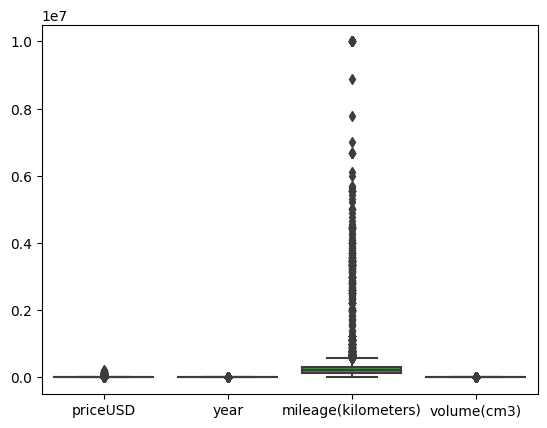

In [117]:
sns.boxplot(data=cars);

**PriceUSD**

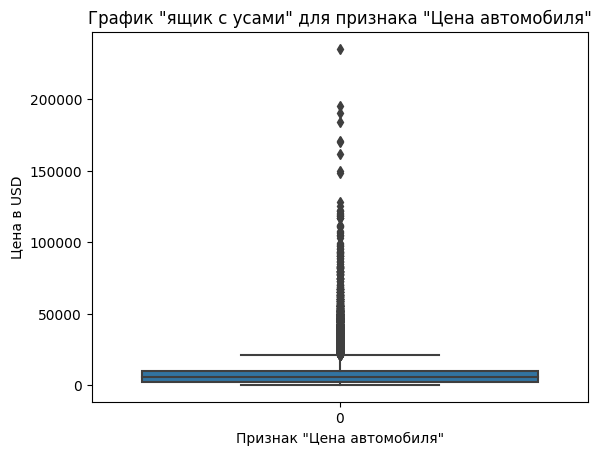

In [118]:
sns.boxplot(data=cars['priceUSD']);
plt.xlabel('Признак "Цена автомобиля"');
plt.ylabel('Цена в USD');
plt.title('График "ящик с усами" для признака "Цена автомобиля"');

В целом, данный график нам говорит о том, что много значений выбросов, но проблема в том, что скорее всего эти выбросы могут быть просто очень дорогими машинами, которые действительно стоят этих денег. 

Поэтому для этого признака нет необходимости делать что-то с выбросами.


**year**

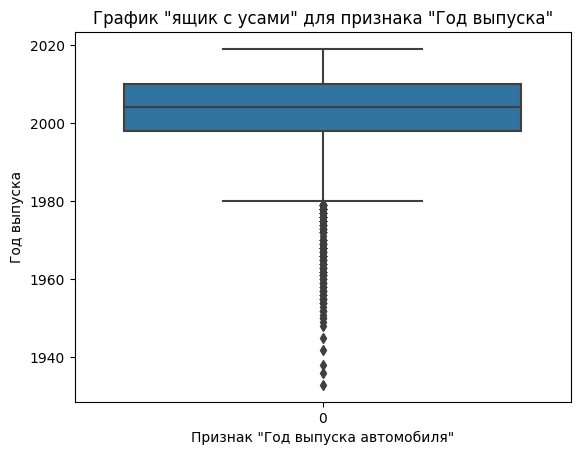

In [119]:
sns.boxplot(data=cars['year']);
plt.xlabel('Признак "Год выпуска автомобиля"');
plt.ylabel('Год выпуска');
plt.title('График "ящик с усами" для признака "Год выпуска"');

Тут нужно уделить внимание машинам до 1980 года, попробуем определить не попали ли туда современные машины. В целом даты выпуска примерно похожи на правду и такие автомобили правда могут быть выложены на продажу.

In [120]:
cars.loc[(cars['year']<1970)].sample(10)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
33002,gaz,m-20-pobeda,3500,1954,with mileage,100.0,petrol,2500.0,brown,mechanics,front-wheel drive,unknown
878,gaz,21,4000,1959,with mileage,50000.0,petrol,2400.0,white,mechanics,unknown,E
879,gaz,21,8500,1968,with mileage,80000.0,petrol,2400.0,gray,mechanics,rear drive,E
863,gaz,21,999,1961,with mileage,0.0,petrol,2400.0,gray,mechanics,front-wheel drive,E
1076,gaz,69,2000,1954,with mileage,150000.0,petrol,2500.0,green,mechanics,all-wheel drive,unknown
4483,moskvich,407,10000,1959,with mileage,58000.0,petrol,1358.0,other,mechanics,rear drive,unknown
4726,moskvich,410,1379,1958,with mileage,50000.0,petrol,1400.0,red,mechanics,part-time four-wheel drive,unknown
43024,eksklyuziv,retro,50000,1933,with mileage,1.0,petrol,2400.0,black,mechanics,unknown,unknown
1048,gaz,67,9200,1948,with mileage,100000.0,petrol,3200.0,green,mechanics,part-time four-wheel drive,unknown
4487,moskvich,407,8300,1960,with mileage,300.0,petrol,1300.0,green,mechanics,rear drive,unknown


In [121]:
cars.loc[(cars['year']<1930)].head(10)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment


В целом можем увидеть, что каких-то выбивающихся аномалий нет в данных. Поэтому оставим их как они есть, кроме одной записи, которая включает в себя ЗАЗ-968, этот автмобиль выпускался с 1970 по 1979. Эту запись мы удалим.

In [122]:
cars = cars.loc[(cars['year']>=1930)]

**mileage(kilometers)**

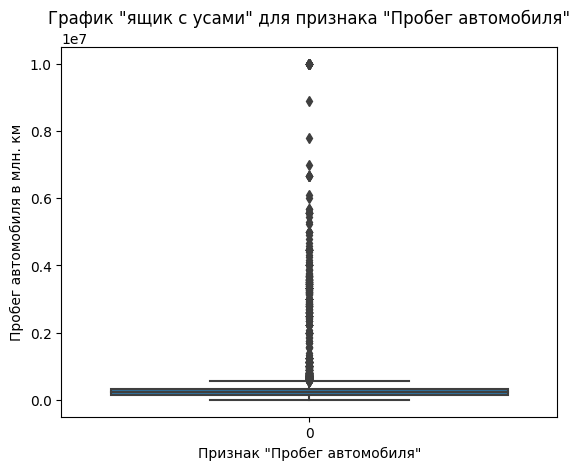

In [123]:
sns.boxplot(data=cars['mileage(kilometers)']);
plt.xlabel('Признак "Пробег автомобиля"');
plt.ylabel('Пробег автомобиля в млн. км');
plt.title('График "ящик с усами" для признака "Пробег автомобиля"');

Основное скопление автомобилей находится до 200тысяч км, но и автомобили с пробегом до 1 млн км это нормально, потому что есть информация о таких экземплярах. Что-то делать с этими выбросами опасно, можем потерять ценные данные. 

Чтобы проверить насколько правдивы данные о пробеге, нужно смотреть на данные, которые отображает сам автомобиль и сверять их вручную.

**volume(cm3)**

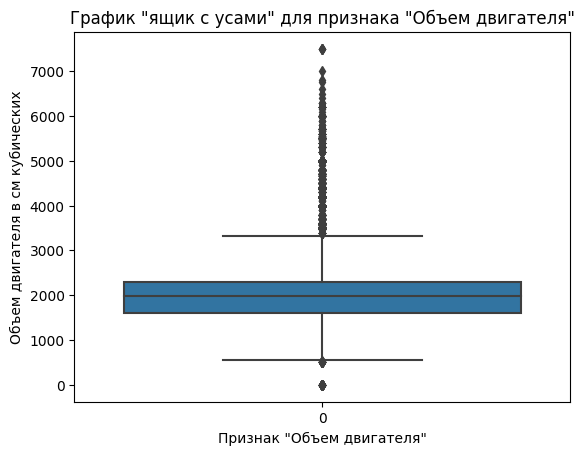

In [124]:
sns.boxplot(data=cars['volume(cm3)']);
plt.xlabel('Признак "Объем двигателя"');
plt.ylabel('Объем двигателя в см кубических');
plt.title('График "ящик с усами" для признака "Объем двигателя"');

Очень много данных с огромными объемами двигателя, нужно изучить подробнее

In [125]:
cars.loc[cars['volume(cm3)']>7500].head(5)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment


После изучения этой темы в интернете, можно точно сказать, что лучше убрать машины с объемом двигателя более 7500 см3.

In [126]:
cars = cars.loc[cars['volume(cm3)']<=7500]

### Изучение остальных признаков, с помощью визуализации

Визуализация в этой части еще будет производиться, графики без оформления нужны для бысрого ознакомления

<Axes: xlabel='segment'>

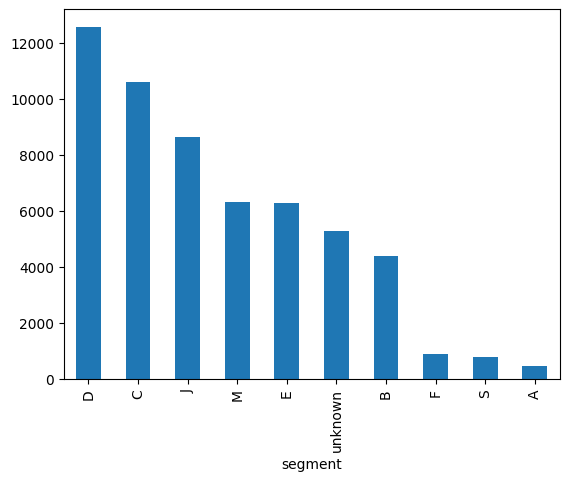

In [127]:
cars['segment'].value_counts().plot(kind='bar')

Здесь в принципе все впорядке с данными

<Axes: xlabel='drive_unit'>

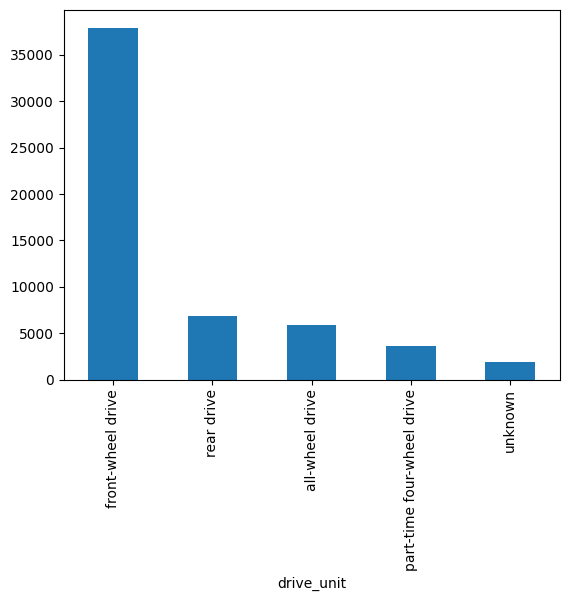

In [128]:
cars['drive_unit'].value_counts().plot(kind='bar')

Преобладает перелний привод, но и остальных достаточное для изучения количество.

<Axes: xlabel='fuel_type'>

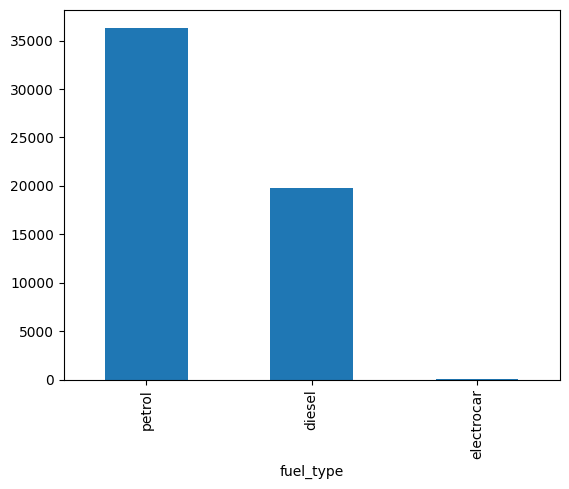

In [129]:
cars['fuel_type'].value_counts().plot(kind='bar')

<Axes: xlabel='transmission'>

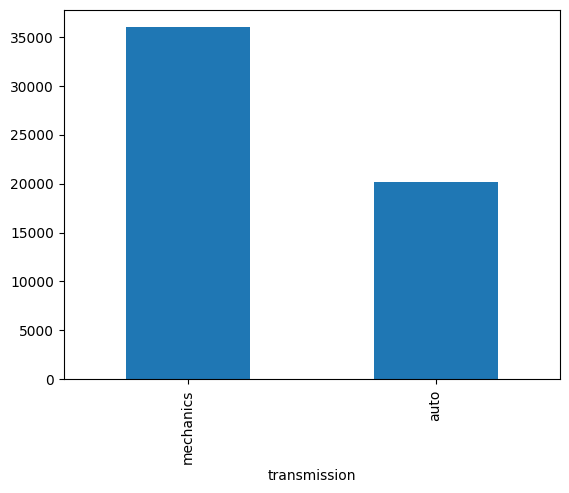

In [130]:
cars['transmission'].value_counts().plot(kind='bar')

Далее будут изучены остальные категориальные признаки.

## Создание новых признаков

Есть несколько идей новых признаков, в том числе они будут внедрены после добавления парсинга и вытягивания дополнительной информации с сайта auto.ru

Одним из примеров может быть страна производитель, или страна, которая выпустила автомобиль(то есть та страна, где он был собран). Это может быть трудно реализуемо, потому на данный момент этот этап пропускается.

Также можно добавить например кол-во мест или кол-во дверей в автомобиле.

## Гипотезы

### Гипотеза 1

Нулевая гипотеза: Цена автомобилей с автоматической коробкой передач выше цен на автомобили с механической.

Альтернативная: ...


Необходимость проверки этой гипотезы: Многие раритетные автомобили, которые стоят больших денег, имеют механику, но автомобили с автоматом стоят обычно дороже, поэтому необходимо узнать как этот параметр влияет на цену


### Гипотеза 2

Нулевая гипотеза: Автомобили на бензине имеют такую же стоимость как и автомобили на дизеле.

Альтернативная: ...


Необходимость проверки этой гипотезы: Важно проверить как влияет этот фактор

##  Машинное обучение

### Кодирование категориальных признаков

### Проверка разных моделей

План заключается в использовании нескольких разных видов моделей: Линейная регрессия, Случайный лес, Catboost

Модели могут по-разному себя показать, поэтому протестируем несколько вариантов.